In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from astropy.table import Table,Column,join
from astropy.io import fits
import numpy as np
import matplotlib.gridspec as gridspec

from scipy.optimize import minimize
import scipy.stats as stats

import os
import requests
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=UserWarning, append=True)
plt.rcParams['text.usetex']=True
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20 

In [2]:
#data = Table.read('/home/mel/Dropbox/gzhubble/hubble_files/catalog_debiasing_files/new_sb_method/draft_2_debiased_tables/catalog_9_6_2016_hubble.fits')    
data = Table.read('/Users/willettk/Astronomy/Research/GalaxyZoo/gzhubble/draft_2_debiased_tables/catalog_9_6_2016_hubble.fits')    


In [3]:
f = 't01_smooth_or_features_a02_features_or_disk_weighted_fraction'


## Check fraction of correctable galaxies as a function of redshift and f_features_weighted

In [4]:
xbins = 10
ybins = 7
zmin = .3
zmax = 1
fmin = 0
fmax = 1


correctable = data[(data['correction_type']==0)]

correctable_hist,xedges,yedges = np.histogram2d(correctable[f],correctable['Z_BEST'],range=((fmin,fmax),(zmin,zmax)),bins=(xbins,ybins))
all_hist,xedges,yedges = np.histogram2d(data[f],data['Z_BEST'],range=((fmin,fmax),(zmin,zmax)),bins=(xbins,ybins))

correctable_fraction_hist = correctable_hist / all_hist

extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]

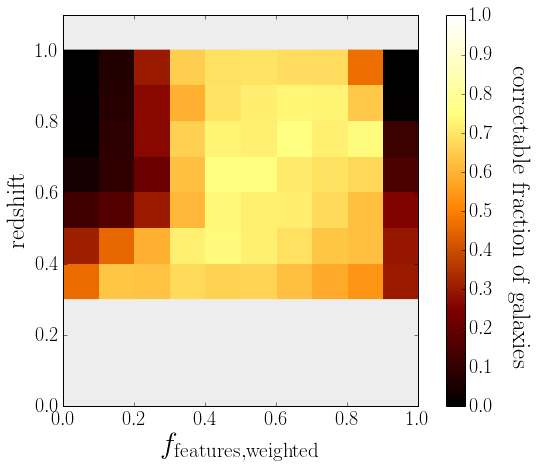

In [10]:
cmap = "afmhot"
f=plt.figure(figsize=(10,7))
ax=plt.subplot(111,axisbg='#EDEDED')
plt.imshow(correctable_fraction_hist.T,origin='lower',extent=extent,interpolation='nearest',cmap=cmap,aspect=1,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel('$f_\mathrm{features,weighted}$',fontsize=30)
plt.ylabel('$\mathrm{redshift}$',fontsize=25)
plt.ylim(0.0,1.1)
f.text(.87,.5,'$\mathrm{correctable~fraction~of~galaxies}$',fontsize=25,rotation=270,verticalalignment='center')
plt.savefig('../../writeup/figures/correctable_fraction.pdf')
